# Benchmark notebook

Create synthetic dataset to test our creations and compare with our linear regression friend!

[-4.05995465 -4.19452531 -4.25796844 -4.35112282 -4.35093246 -4.43547182
 -4.50426075 -4.49793215 -4.54628231 -4.51813469 -4.67271639 -4.70067764
 -4.68525825 -4.79120199 -4.81051404 -4.73777782 -4.85170437 -4.85743155
 -4.96610542 -4.89877515 -4.968684   -4.98246951 -5.02981567 -5.00137589
 -4.99340812 -4.97616322 -5.03997181 -4.97518002 -5.02202233 -4.96056877
 -4.93387548 -5.00024934 -4.95221517 -5.01825996 -5.01435721 -4.92709116
 -4.9931981  -4.99058382 -5.00705997 -4.98802228 -4.9957703  -4.94932278
 -4.95047034 -4.89115396 -4.91036569 -4.88288554 -4.82818206 -4.78225188
 -4.78175531 -4.74626799 -4.6551284  -4.62506915 -4.52867382 -4.56902178
 -4.55656053 -4.44286774 -4.28372669 -4.36743232 -4.24726696 -4.177458  ]


<AxesSubplot:>

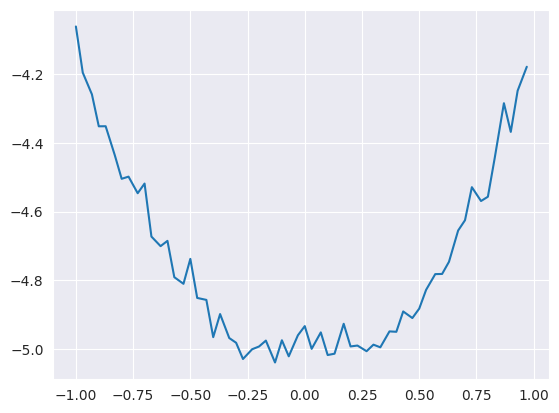

In [1]:
import numpy as np
import seaborn as sns

# Generate dataset using weird non-linear function

n_obs = 60
step = 2 / n_obs
x_1 = np.arange(-1, 1, step=step)
x_1 = np.array(list(map(lambda x: np.round(x, 2), x_1)))
x_2 = np.random.normal(0, 0.05, n_obs) - np.log(np.abs(x_1) + 1) / 5

y = x_1 ** 2 + x_2 - 5
print(y)

sns.lineplot(x=x_1, y=y)

In [2]:
# np.random.normal(0, 1, n_obs)
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.15468977],
       [-0.15468977,  1.        ]])

(60, 3)
Optimal weights: [[-4.91721566]
 [-0.08304265]
 [-2.21781435]]
RMSE = 0.19140974074115114


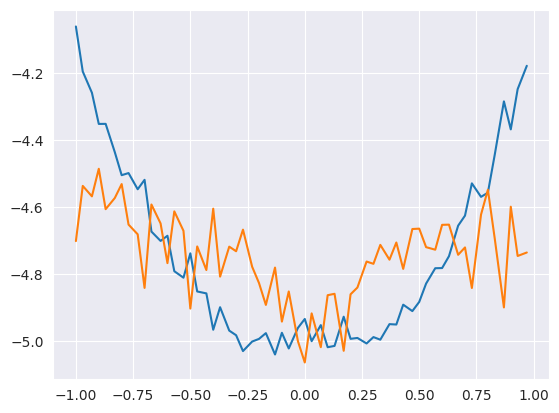

In [3]:
# Bench-mark it with a dumb model
X = np.matrix([np.ones(n_obs), x_1, x_2]).T
print(X.shape)

beta_s = np.linalg.inv((X.T * X)) * X.T * y.reshape(-1, 1)
print(f"Optimal weights: {beta_s}")

y_pred = beta_s.T * X.T
y_pred = np.squeeze(np.asarray(y_pred))

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=y_pred)
rss = np.sqrt((y - y_pred) ** 2)
print(f"RMSE = {rss.mean()}")

In [9]:
# OK, lets go for a minimal decision tree
from core.decision_tree_mini import DT

_mobs = 20
tree = DT(minimum_obs=_mobs, maximum_tree_size=30)
tree = tree.fit(np.asarray(X), y)
tree.print_tree(tree, col_names=['constant', 'f1', 'f2'])



|ROOT|f1(-0.803)
FINAL VAL: -4.274995917432932
|R|-f1(0.7910000000000001)
|L|--f1(-0.642)
FINAL VAL: -4.547865256796358
|R|---f2(0.014300422859482145)
|L|----f1(0.6420000000000002)
|L|-----f1(0.521)
|L|------f1(0.4030000000000001)
FINAL VAL: -4.990525253263926
FINAL VAL: -4.894801728029058
FINAL VAL: -4.784614308340739
FINAL VAL: -4.594473288853821
FINAL VAL: -4.9497861211557215
FINAL VAL: -4.345885375335123


RMSE = 0.064570607021285


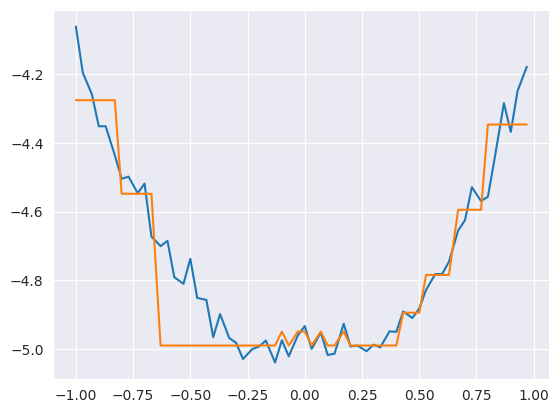

In [10]:
pred = lambda x: tree.predict(tree, x)
tree_preds = np.array([pred(np.asarray(X)[i,:]) for i in range(X.shape[0])])

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=tree_preds)
rss = np.sqrt((y - tree_preds) ** 2)
print(f"RMSE = {rss.mean()}")



RMSE = 0.4667820005058185


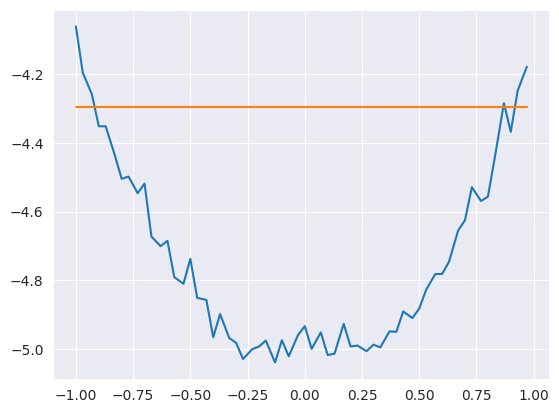

In [12]:
# OK, our dumb tree can actually learn something, and it's better than the linear regression fren
# Lets go for EBM
from core.ebm_mini import EBM

_minobs = 100
_max_tree = 30
test = EBM(num_iter=_minobs, max_tree_size=_max_tree, learning_rate=0.1)
test = test.fit(np.asarray(X), y)
ebm_pred = lambda x: test.predict(x)
ebm_preds = np.array([ebm_pred(np.asarray(X)[i,:]) for i in range(X.shape[0])])

sns.lineplot(x=x_1, y=y)
sns.lineplot(x=x_1, y=ebm_preds)
rss = np.sqrt((y - ebm_preds) ** 2)
print(f"RMSE = {rss.mean()}")


In [32]:
# DT.print_tree(test.model[1][5],col_names=['constant', 'f1', 'f2'])
x1 = []
for idx,m in enumerate(test.model[1]):
    if idx < X.shape[0]:
        x1.append(DT.predict(m, np.asarray(X[idx,1]).reshape(-1,1)))

x1



[0.4689199344931863,
 0.017303452211494413,
 0.0011396476843193195,
 0.0023817816681878864,
 0.002653681388234246,
 0.0027047732183751935,
 0.002719579952319931,
 0.002724196011930841,
 0.002725648239910001,
 0.00272610561059262,
 0.0027262496752550485,
 0.002726295054073601,
 0.0027263093479387526,
 0.002726313850361486,
 0.0027263152685790756,
 0.002726315715303268,
 0.0027263158560168615,
 0.002726315900340221,
 0.0027263159143016296,
 0.0027263159186993366,
 0.002726315920084562,
 0.0027263159212747947,
 0.0027263159208958075,
 0.0027263159207764286,
 0.0027263159206891707,
 0.0027263159207113405,
 0.002726315920718328,
 0.0027263159207197873,
 0.0027263159207209877,
 0.0027263159207213616,
 0.0027263159207214804,
 0.0027263159207215203,
 0.0027263159207215272,
 0.0027263159207215368,
 0.0027263159207215337,
 0.0027263159207215368,
 0.0027263159207215337,
 0.0027263159207215337,
 0.0027263159207215368,
 0.0027263159207215337,
 0.0027263159207215337,
 0.0027263159207215394,
 0.00272

In [29]:
np.asarray(X[2,1]).reshape(-1,1)

array([[-0.93]])